# Fire Detection using Deep Learning

## Importing the Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from pathlib import Path
import os.path


## Loading the Dataset

In [2]:
BASE_DIR ="fire_dataset/"   # rename if different
FIRE_DIR = os.path.join(BASE_DIR, "fire_images/")
NONFIRE_DIR = os.path.join(BASE_DIR, "non_fire_images/")

print("Fire images:", len(os.listdir(FIRE_DIR)))
print("Non-fire images:", len(os.listdir(NONFIRE_DIR)))

Fire images: 756
Non-fire images: 244


In [12]:
import random
from PIL import Image

def show_samples(folder, title):
    plt.figure(figsize=(12,4))
    for i in range(5):
        file = random.choice(os.listdir(folder))
        img = Image.open(os.path.join(folder, file))
        plt.subplot(1,5,i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

show_samples(FIRE_DIR, "🔥 Fire Images")
show_samples(NONFIRE_DIR, "🌿 Non-Fire Images")

## Data Preprocessing and Image Data Generator

In [4]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

In [5]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,   # ensures equal split
)

train_gen = datagen.flow_from_directory(
    BASE_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    BASE_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 802 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


## CNN Model Architecture

In [13]:
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),

    layers.Dense(1, activation='sigmoid')   # Binary output
])

model.compile(
    optimizer=Adam(0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


## Model Training

In [14]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=25,
)


## Visualizations

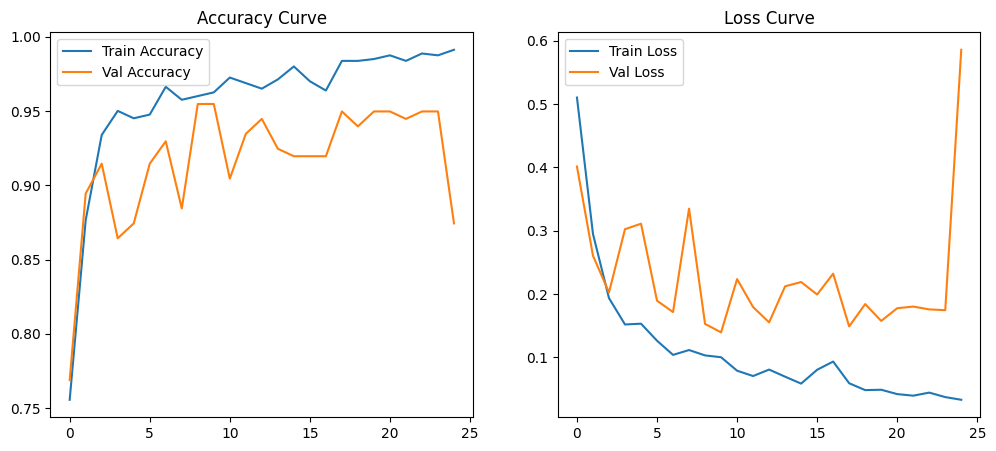

In [8]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Curve")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Curve")

plt.show()


##### From the visualization, we can see that the Initial model shows differences between training and validation performance because
-training accuracy steadily increases, while validation accuracy fluctuates, indicating inconsistent learning on unseen data
-training loss decreases smoothly, but validation loss jumps up and down, showing the model struggles to generalize
-the validation curves are unstable due to limited data and class variations and the gap between training and validation metrics suggests early overfitting, where the model learns the training images well but not the validation ones.

## Predictions and Results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


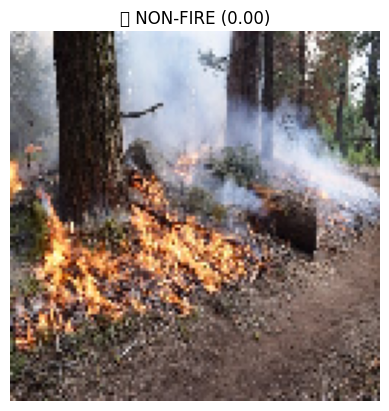

In [10]:
from tensorflow.keras.preprocessing import image

def predict_image(path):
    img = image.load_img(path, target_size=IMG_SIZE)
    img_arr = image.img_to_array(img) / 255.0
    img_arr = np.expand_dims(img_arr, axis=0)

    pred = model.predict(img_arr)[0][0]

    plt.imshow(img)
    plt.axis('off')

    if pred > 0.5:
        plt.title("🔥 FIRE detected! (%.2f)" % pred)
    else:
        plt.title("🌿 NON-FIRE (%.2f)" % pred)

    plt.show()

# Example
predict_image("fire_dataset/fire_images/fire.12.png")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


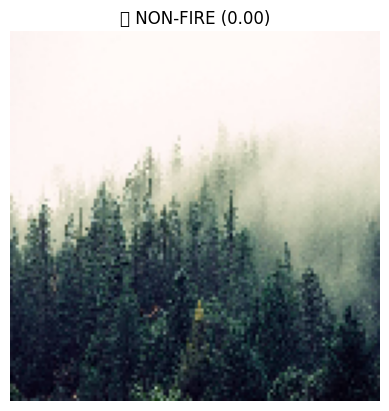

In [11]:
predict_image("fire_dataset/non_fire_images/non_fire.65.png")


The model predicted several test images incorrectly, which indicates that the Initial Model failed to generalize well to unseen data and is not able to accurately distinguish between fire and non-fire images.